# **Licenciatura em Ciências da Computação**

### Aprendizagem Computacional 25/26

# 🍷 Wine Dataset — Complete Pipeline Solution
This notebook applies the full pipeline:
- Standardization
- Exploratory analysis
- PCA
- K-Means clustering
- Elbow method
- Silhouette analysis


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## 1️⃣ Load Dataset

In [ ]:
wine = load_wine()

X = wine.data
y = wine.target

df = pd.DataFrame(X, columns=wine.feature_names)
df["target"] = y

df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
print("Shape:", df.shape)
df.describe()


Shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


## 2️⃣ Standardization

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Mean (approx):", np.round(X_scaled.mean(axis=0)[:5], 3))
print("Std (approx):", np.round(X_scaled.std(axis=0)[:5], 3))


Mean (approx): [ 0.  0. -0. -0. -0.]
Std (approx): [1. 1. 1. 1. 1.]


## 3️⃣ Correlation Matrix

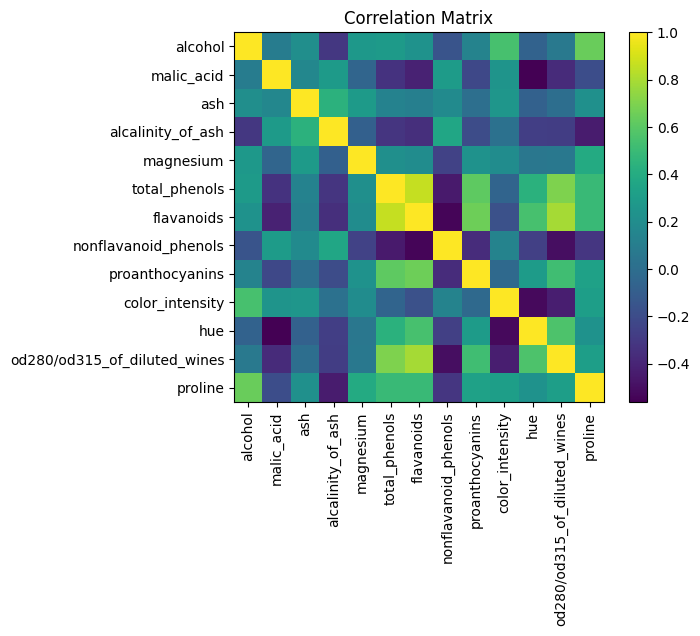

In [ ]:
corr = df.drop(columns=["target"]).corr()

plt.figure()
plt.imshow(corr)
plt.title("Correlation Matrix")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()


## 4️⃣ PCA

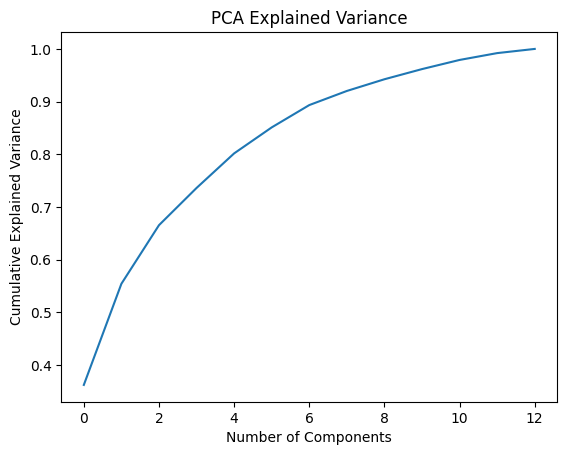

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.figure()
plt.plot(cumulative_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance")
plt.show()


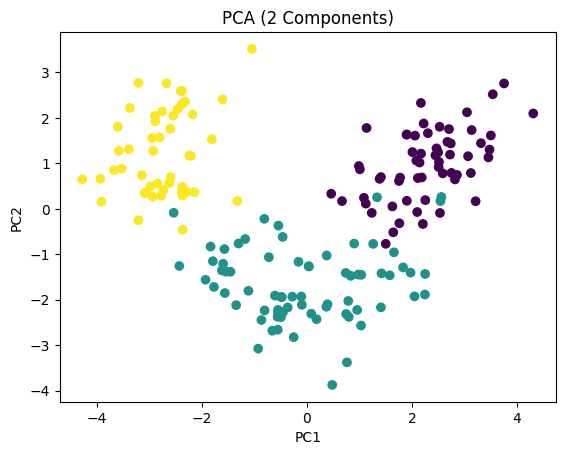

In [ ]:
pca_2 = PCA(n_components=2)
X_pca_2 = pca_2.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2 Components)")
plt.show()


## 5️⃣ K-Means — Elbow Method

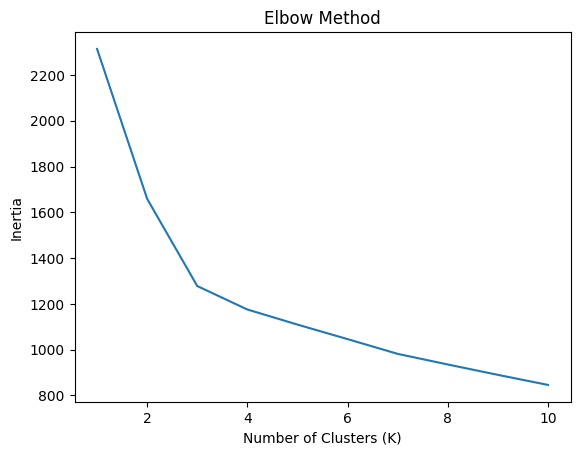

In [ ]:
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(K_range, inertias)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


## 6️⃣ Silhouette Analysis

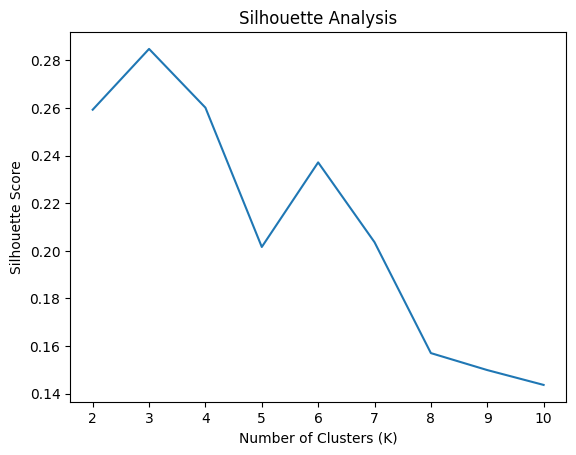

Best K (Silhouette): 3


In [ ]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.figure()
plt.plot(range(2,11), silhouette_scores)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

best_k = range(2,11)[np.argmax(silhouette_scores)]
print("Best K (Silhouette):", best_k)


## 7️⃣ Final Clustering

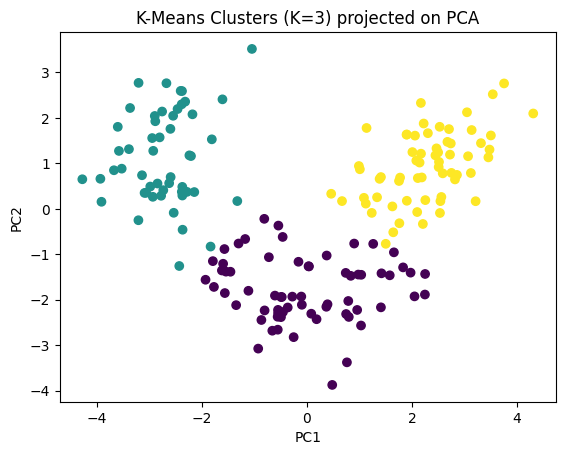

In [ ]:
kmeans_final = KMeans(n_clusters=best_k, n_init=10, random_state=42)
clusters = kmeans_final.fit_predict(X_scaled)

plt.figure()
plt.scatter(X_pca_2[:,0], X_pca_2[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title(f"K-Means Clusters (K={best_k}) projected on PCA")
plt.show()


In [ ]:
pd.crosstab(clusters, y, rownames=["Cluster"], colnames=["True Class"])


True Class,0,1,2
Cluster,,,
0,0,65,0
1,0,3,48
2,59,3,0
